<a href="https://colab.research.google.com/github/Ujjwalb2/investx/blob/main/Untitled2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [40]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
#from datetime import datetime

In [59]:
df = pd.read_csv('/content/Train (1).csv')
print(df.head())
df=df.head(150)

         Date    Stock  liabilities      equity  total_assets  current_assets  \
0  31-07-2006  Stock 1   625.898686  925.086518   1550.985204      675.789906   
1  31-08-2006  Stock 1   407.387467  903.249093   1310.636561     1023.110983   
2  29-09-2006  Stock 1   464.069890  602.668832   1066.738722      709.711673   
3  31-10-2006  Stock 1   855.854937  391.375369   1247.230306      649.979564   
4  30-11-2006  Stock 1   453.954969  956.490566   1410.445534     1115.594551   

   current_liabilities  total_revenue  net_income   dividend  \
0           555.931328     548.488451  251.282553  68.184030   
1          1295.186240     513.446432  207.576940  42.232672   
2           598.719338     503.519871  133.719700  28.835722   
3           733.594339     596.006397  -76.881818   0.000000   
4          1152.274711     965.939247 -309.204301   0.000000   

   shares_outstanding       price  
0             1040831  100.000000  
1             1046649  101.924169  
2             109415

In [60]:
cols = list(df)[2:12]
print(cols)

['liabilities', 'equity', 'total_assets', 'current_assets', 'current_liabilities', 'total_revenue', 'net_income', 'dividend', 'shares_outstanding', 'price']


In [61]:
df_for_training = df[cols].astype(float)

In [62]:
scaler = StandardScaler()
scaler = scaler.fit(df_for_training)
df_for_training_scaled = scaler.transform(df_for_training)

In [63]:
trainX = []
trainY = []

In [64]:
n_future = 1   # Number of days we want to look into the future based on the past days.
n_past = 14 # Number of past days we want to use to predict the future.

In [65]:
for i in range(n_past, len(df_for_training_scaled) - n_future +1):
    trainX.append(df_for_training_scaled[i - n_past:i, 0:df_for_training.shape[1]])
    trainY.append(df_for_training_scaled[i + n_future - 1:i + n_future, 9])

trainX, trainY = np.array(trainX), np.array(trainY)

print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (136, 14, 10).
trainY shape == (136, 1).


In [66]:
df_for_training_scaled

array([[ 0.25220378,  1.41884066,  1.28105593, ...,  1.83696687,
        -0.33248576, -2.39597646],
       [-0.59414981,  1.34029146,  0.61107448, ...,  0.87868441,
        -0.12707445, -2.14167173],
       [-0.37460332,  0.25910443, -0.0688005 , ...,  0.38398725,
         1.55028652, -1.97752194],
       ...,
       [-1.25021177,  0.92718225, -0.18122825, ..., -0.68080352,
         1.33922622,  0.45098837],
       [ 0.95077629,  0.38434975,  0.98211698, ..., -0.68080352,
        -0.14949387,  0.29755242],
       [ 0.68338604,  0.6752647 ,  1.01512818, ..., -0.68080352,
         0.83872591,  0.20597296]])

In [67]:
trainY

array([[-1.29336659],
       [-1.47769308],
       [-1.39607302],
       [-1.48510424],
       [-1.5262249 ],
       [-1.43369363],
       [-1.29010226],
       [-1.37039056],
       [-1.54880656],
       [-1.76081581],
       [-1.69680298],
       [-1.6323744 ],
       [-1.5422965 ],
       [-1.4960694 ],
       [-1.44809413],
       [-1.39580814],
       [-1.17350716],
       [-1.13197986],
       [-0.95825406],
       [-0.76492415],
       [-0.47399161],
       [-0.45596222],
       [-0.51737493],
       [-0.63911434],
       [-0.78122505],
       [-0.74318884],
       [-0.71427425],
       [-0.60842931],
       [-0.56264839],
       [-0.59513762],
       [-0.48704487],
       [-0.55989147],
       [-0.50403421],
       [-0.31532371],
       [-0.24776968],
       [-0.24399868],
       [-0.17562414],
       [-0.0511738 ],
       [-0.27321327],
       [-0.29749954],
       [-0.1927685 ],
       [-0.10050399],
       [-0.03464018],
       [ 0.07409369],
       [ 0.00314231],
       [-0

In [68]:
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=True)) 
model.add(LSTM(32, activation='relu', return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_4 (LSTM)               (None, 14, 64)            19200     
                                                                 
 lstm_5 (LSTM)               (None, 32)                12416     
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 31,649
Trainable params: 31,649
Non-trainable params: 0
_________________________________________________________________


In [69]:
history = model.fit(trainX, trainY, epochs=5, batch_size=3, validation_split=0.1, verbose=1)

Epoch 1/5
41/41 [==============================] - 5s 33ms/step - loss: 0.4391 - val_loss: 0.0627
Epoch 2/5
41/41 [==============================] - 1s 16ms/step - loss: 0.1216 - val_loss: 0.0526
Epoch 3/5
41/41 [==============================] - 1s 16ms/step - loss: 0.0707 - val_loss: 0.0489
Epoch 4/5
41/41 [==============================] - 1s 17ms/step - loss: 0.0620 - val_loss: 0.0447
Epoch 5/5
41/41 [==============================] - 1s 16ms/step - loss: 0.0460 - val_loss: 0.0488


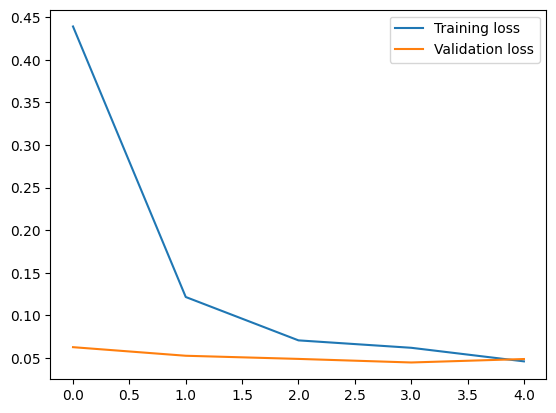

In [70]:
plt.plot(history.history['loss'], label='Training loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.legend()

In [71]:
from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
us_bd = CustomBusinessDay(calendar=USFederalHolidayCalendar())

In [72]:
df2= df.head(150)
train_dates = pd.to_datetime(df2['Date'])
print(train_dates.tail(15)) 

135   2017-10-31
136   2017-11-30
137   2017-12-29
138   2018-01-31
139   2018-02-28
140   2018-03-30
141   2018-04-30
142   2018-05-31
143   2018-06-29
144   2018-07-31
145   2018-08-31
146   2018-09-28
147   2018-10-31
148   2018-11-30
149   2018-12-31
Name: Date, dtype: datetime64[ns]


<ipython-input-72-8e23a519e50a>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  train_dates = pd.to_datetime(df2['Date'])


In [73]:
n_past = 4
n_days_for_prediction=100  #let us predict past 15 days

predict_period_dates = pd.date_range(list(train_dates)[-n_past], periods=n_days_for_prediction, freq='M').tolist()
print(predict_period_dates)

[Timestamp('2018-09-30 00:00:00', freq='M'), Timestamp('2018-10-31 00:00:00', freq='M'), Timestamp('2018-11-30 00:00:00', freq='M'), Timestamp('2018-12-31 00:00:00', freq='M'), Timestamp('2019-01-31 00:00:00', freq='M'), Timestamp('2019-02-28 00:00:00', freq='M'), Timestamp('2019-03-31 00:00:00', freq='M'), Timestamp('2019-04-30 00:00:00', freq='M'), Timestamp('2019-05-31 00:00:00', freq='M'), Timestamp('2019-06-30 00:00:00', freq='M'), Timestamp('2019-07-31 00:00:00', freq='M'), Timestamp('2019-08-31 00:00:00', freq='M'), Timestamp('2019-09-30 00:00:00', freq='M'), Timestamp('2019-10-31 00:00:00', freq='M'), Timestamp('2019-11-30 00:00:00', freq='M'), Timestamp('2019-12-31 00:00:00', freq='M'), Timestamp('2020-01-31 00:00:00', freq='M'), Timestamp('2020-02-29 00:00:00', freq='M'), Timestamp('2020-03-31 00:00:00', freq='M'), Timestamp('2020-04-30 00:00:00', freq='M'), Timestamp('2020-05-31 00:00:00', freq='M'), Timestamp('2020-06-30 00:00:00', freq='M'), Timestamp('2020-07-31 00:00:00'

In [74]:
prediction = model.predict(trainX[-n_days_for_prediction:]) 

4/4 [==============================] - 0s 9ms/step


In [75]:
prediction_copies = np.repeat(prediction, df_for_training.shape[1], axis=-1)
y_pred_future = scaler.inverse_transform(prediction_copies)[:,9]

In [76]:
forecast_dates = []
for time_i in predict_period_dates:
    forecast_dates.append(time_i.date())
    
df_forecast = pd.DataFrame({'Date':np.array(forecast_dates), 'price':y_pred_future})
df_forecast['Date']=pd.to_datetime(df_forecast['Date'])

In [77]:
original = df[['Date', 'price']]
original['Date']=pd.to_datetime(original['Date'])
original


<ipython-input-77-20f60c629b61>:2: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  original['Date']=pd.to_datetime(original['Date'])
<ipython-input-77-20f60c629b61>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  original['Date']=pd.to_datetime(original['Date'])


,Date,price
0,2006-07-31,100.000000
1,2006-08-31,101.924169
2,2006-09-29,103.166191
3,2006-10-31,104.478956
4,2006-11-30,104.160907
...,...,...
145,2018-08-31,120.895608
146,2018-09-28,120.817217
147,2018-10-31,121.541253
148,2018-11-30,120.380297


In [78]:
df_forecast

,Date,price
0,2018-09-30,117.666496
1,2018-10-31,117.754211
2,2018-11-30,117.774895
3,2018-12-31,117.871895
4,2019-01-31,117.907425
...,...,...
95,2026-08-31,123.248222
96,2026-09-30,123.210144
97,2026-10-31,123.269417
98,2026-11-30,123.183388


<Axes: xlabel='Date'>

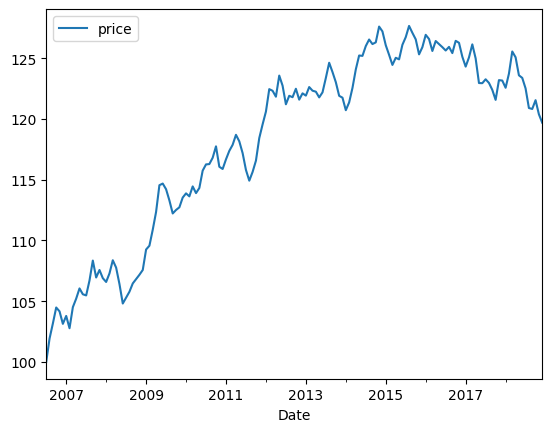

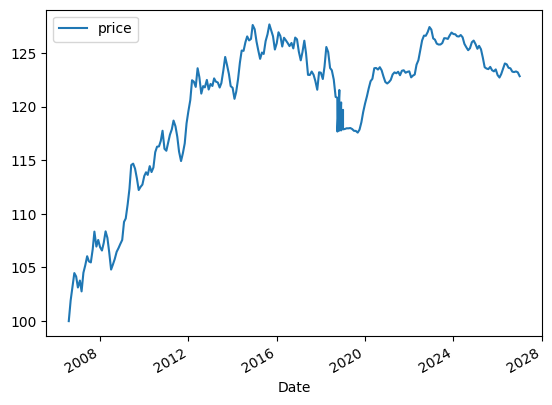

In [79]:
original.plot(x='Date',y='price')
original= pd.concat([original,df_forecast],axis=0)
original.plot(x='Date',y='price')
#f_forecast.plot(x='Date',y='price')


In [80]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse = sqrt(mean_squared_error(original.iloc[:len(df_forecast), 1], df_forecast.iloc[:, 1]))  #calculating rsme(root mean square error)

In [81]:
rmse

10.28022083908127

In [82]:
accuracy=100-rmse

In [83]:
accuracy

89.71977916091873